In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

X=df.iloc[:,:-1]
X_test=df_test.iloc[:,:]
Y=df.iloc[:,-1]

In [2]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imp.fit_transform(X)
col=X_test.columns
X=pd.DataFrame(X,columns=col)

In [3]:
X_test=imp.transform(X_test)
X_test=pd.DataFrame(X_test,columns=col)

In [4]:
cat=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration']
num=[i for i in X.columns if i not in cat]

In [5]:
X1=X.loc[:,cat]
X2=X.loc[:,num]

X1_test=X_test.loc[:,cat]
X2_test=X_test.loc[:,num]

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X1=X1.apply(le.fit_transform)

In [7]:
X1_test=X1_test.apply(LabelEncoder().fit_transform)

In [8]:
X=pd.concat([X1,X2],axis=1)

In [9]:
X_test=pd.concat([X1_test,X2_test],axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [15]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

### Knn  

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X,Y)

KNeighborsClassifier()

In [17]:
Y_pred=classifier.predict(X_test)

In [19]:
classifier.score(X,Y)

0.7881372587555521

In [20]:
id=pd.DataFrame(df_test.ID,columns=['ID'])

In [21]:
respo=pd.DataFrame(Y_pred,columns=['Response'])

In [22]:
pred=pd.concat([id,respo],axis=1)

In [23]:
pred.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,1
3,50886,0
4,50887,1


In [24]:
filename='Submission4.csv'
pred.to_csv(filename,index=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

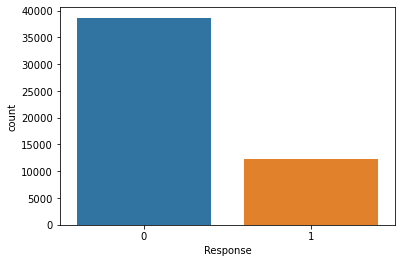

In [26]:
#Univariate analysis target.
import seaborn as sns
sns.countplot(df['Response'])

# Lets try another approch 

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test_1,Y_train,Y_test_1=train_test_split(X,Y,test_size=0.2,random_state=0)


In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
Y_pred=knn.predict(X_test)

In [31]:
Y_pred_1=knn.predict(X_test_1)

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(Y_test_1,Y_pred_1))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      7658
           1       0.25      0.10      0.14      2519

    accuracy                           0.71     10177
   macro avg       0.50      0.50      0.48     10177
weighted avg       0.63      0.71      0.65     10177



In [33]:
roc_auc_score(Y_test_1,Y_pred_1)

0.5018976178017555

In [39]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)


In [40]:
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(knn_2, hyperparameters, cv=4)



In [41]:
#Fit the model
best_model = clf.fit(X,Y)

In [42]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 8


In [46]:
knn1=KNeighborsClassifier(leaf_size=1,n_neighbors=8,p=1)
knn1.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=8, p=1)

In [47]:
Y_pred_2=knn1.predict(X_test_1)

In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test_1,Y_pred_2)
cm

array([[7430,  228],
       [2435,   84]], dtype=int64)

In [49]:
knn1.score(X_test_1,Y_test_1)

0.7383315318856244

In [51]:
Y_pred_sub=knn1.predict(X_test)

In [52]:
Y_pred_sub[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
id=pd.DataFrame(df_test.ID,columns=['ID'])
respo=pd.DataFrame(Y_pred_sub,columns=['Response'])
pred=pd.concat([id,respo],axis=1)


In [54]:
pred.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [55]:
filename='Submission5.csv'
pred.to_csv(filename,index=False)

In [56]:
roc_auc_score(Y_test_1, Y_pred_2)

0.5017868897346477